### Regression Analysis

In [1]:
#Libraries required:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataframe

df = pd.read_csv('DS_C12_S1_Regression_Insurance_Data_Project.csv')
df

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [3]:
#total records(rows) & columns present in the dataset 
df.shape

(1338, 8)

In [4]:
#checking if any null values
df.isnull().sum()

age         0
gender      0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

classif column has '8' null values.

In [5]:
print("The Missing value percentage of classif column is:",(df.classif.isnull().sum()/df.classif.shape[0]*100)
)

The Missing value percentage of classif column is: 0.5979073243647235


In [6]:
#replaced the missing column values with using Mode (Central Tendency Measure)

df['classif'].fillna(df['classif'].mode()[0], inplace=True)

In [7]:
#No null values

df.isnull().sum()

age         0
gender      0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#duplicate records

df.duplicated().sum()

1

In [9]:
#keeping the first duplicates and dropping the next occuring duplicate record

df.drop_duplicates(keep='first',inplace=True)

In [10]:
#information of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   classif   1337 non-null   object 
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   object 
 6   region    1337 non-null   object 
 7   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.0+ KB


In [11]:
#statistical description of the numerical data

df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.148841,30.663452,1.095737,13279.121487
std,14.954106,6.100468,1.205571,12110.359656
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,190.000000,53.130000,5.000000,63770.428010


In [12]:
#created a function to divide the categorical and numerical values

from tabulate import tabulate
def dtype(col):
    cat = []
    con = []
    for col in df:
        if(df[col].dtypes == 'object'):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(df)
table = [cat, con]
print(tabulate({"Categorical": cat, "Continuous": con}, headers=['Category', "Continuous"]))

Category    Continuous
----------  ------------
gender      age
classif     bmi
smoker      children
region      charges


In [13]:
#created a function for category column info

def cat_info(col):
    print(f'Unique values in {col} :{df[col].nunique()}')
    print(f'Missing values count for {col} : {df[col].isnull().sum()}')
    print(f'Mode of {col} : {df[col].mode()[0]}')
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100

#created a function for category column visualization

def visual(col):
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.title(f'Value count of {col}')
    
    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')
    
def main_cat(col):   
    cat_info(col)
    visual(col)

Unique values in gender :2
Missing values count for gender : 0
Mode of gender : male


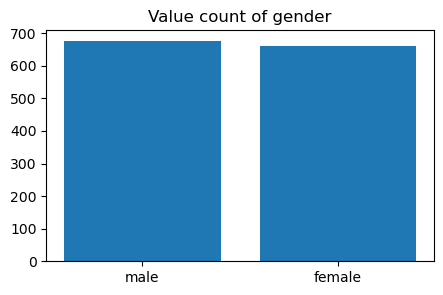

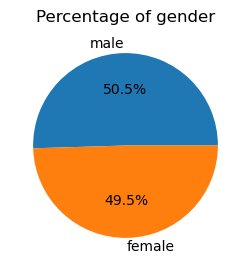

In [14]:
main_cat('gender')

**The Male count is More than the Female Count**

Unique values in classif :6
Missing values count for classif : 0
Mode of classif : OB1


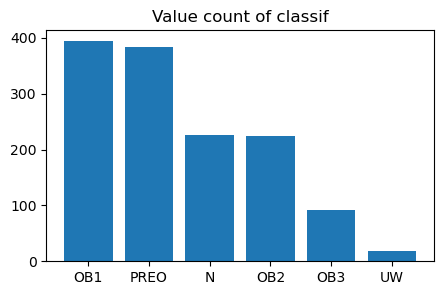

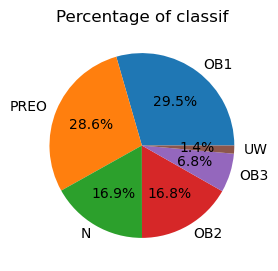

In [15]:
main_cat('classif')

**most of the people are in Obesity Stage 1, followed by Pre-Obesity Stage and Under Weight category are around 1.4%**

Unique values in smoker :2
Missing values count for smoker : 0
Mode of smoker : no


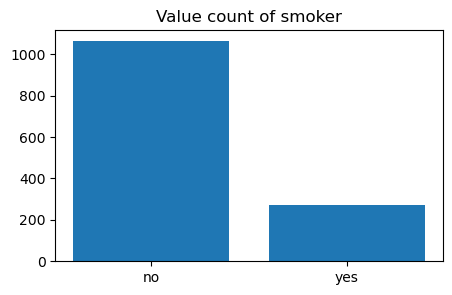

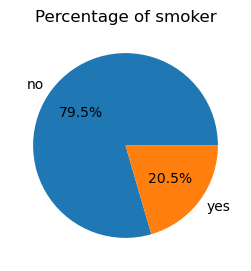

In [16]:
main_cat('smoker')

**Only 20% of the people Smoke**

Unique values in region :4
Missing values count for region : 0
Mode of region : southeast


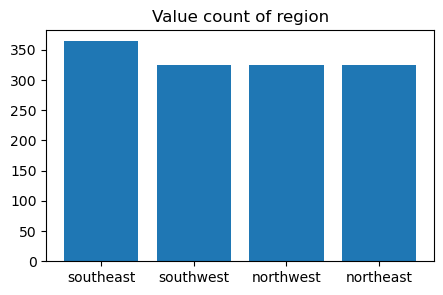

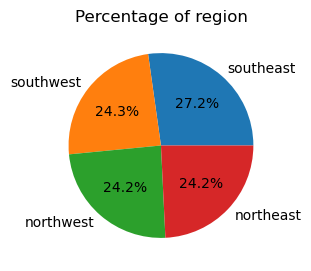

In [17]:
main_cat('region')

**From SouthEast region the count is slightly more when compared with other region's**

In [18]:
#created a function for numerical column info
def num_info(col):
    print(col)
    print("Mean", df[col].mean())
    print(f'skewness {df[col].skew()}')
    print(f'kurtos {df[col].kurt()}')

#created a function for numerical column visualization

def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
def main_num(col):
    num_info(col)
    num_visual(col)

age
Mean 39.148840688107704
skewness 0.5774740639542997
kurtos 7.590200244148235


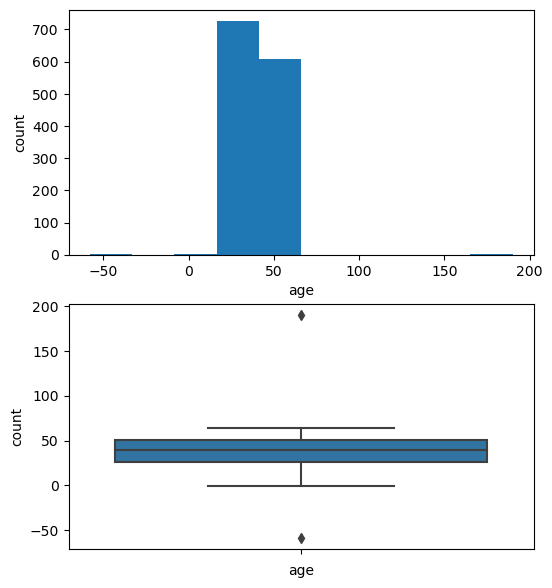

In [19]:
main_num('age')

In [20]:
# a = df[(df["age"] > 0) | (df["age"] < 100)].index
# for i in a:
#     df.loc[i, "age"] = df["age"].mean()

In [21]:
#As 'age' column having outliers, treated the outliers with mean()

df["age"][(df["age"]<5)|(df["age"]>100)]=round(df["age"].mean(),0)

age
Mean 39.19670905011219
skewness 0.05663579975076165
kurtos -1.2346063719322362


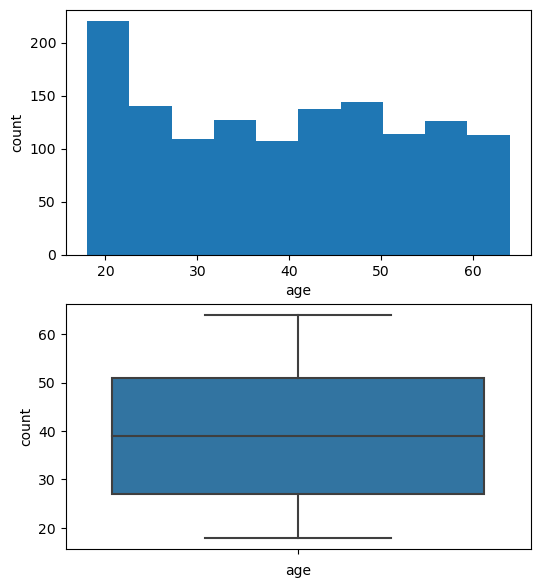

In [22]:
main_num('age')

**Most Customers age is in between 20 - 55**

In [23]:
df['bmi'] = df['bmi'].clip(upper = df['bmi'].quantile(0.95))

bmi
Mean 30.515872101720266
skewness -0.001862426720321735
kurtos -0.6775601051277658


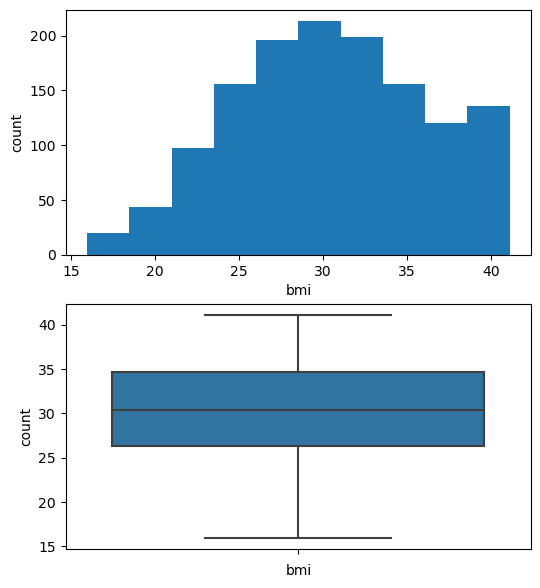

In [24]:
main_num('bmi')

**Most Customers bmi index is between 25 - 35**

children
Mean 1.0957367240089753
skewness 0.9374206440474123
kurtos 0.20095444040352417


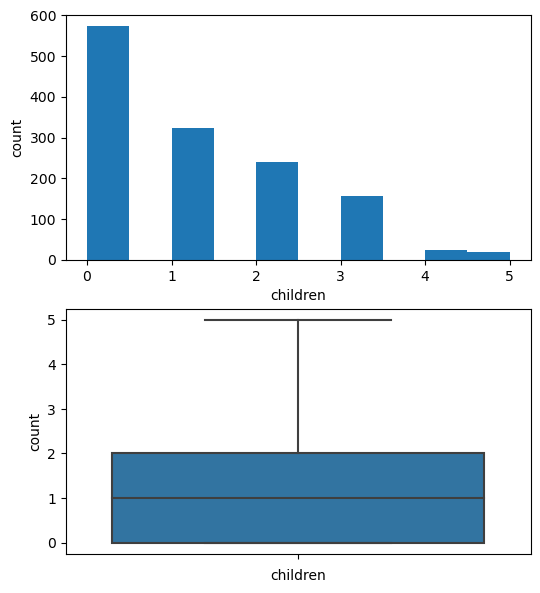

In [25]:
main_num('children')

charges
Mean 13279.121486655948
skewness 1.5153909108403483
kurtos 1.6042206849514362


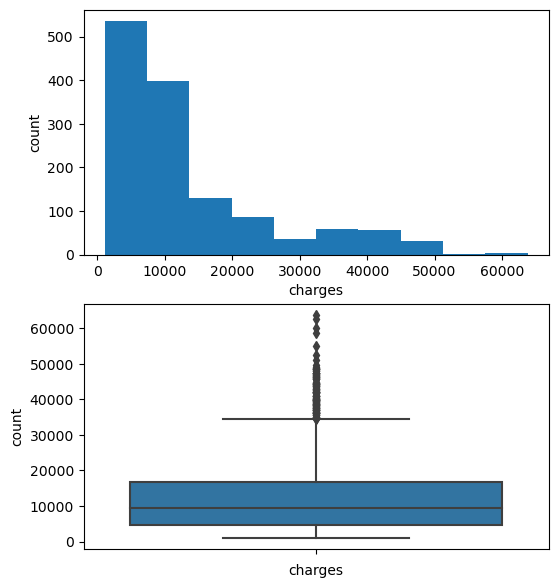

In [26]:
main_num('charges')

**Majority of the Charges are in the range of between 4000 - 17000**

### BI-VARIATE

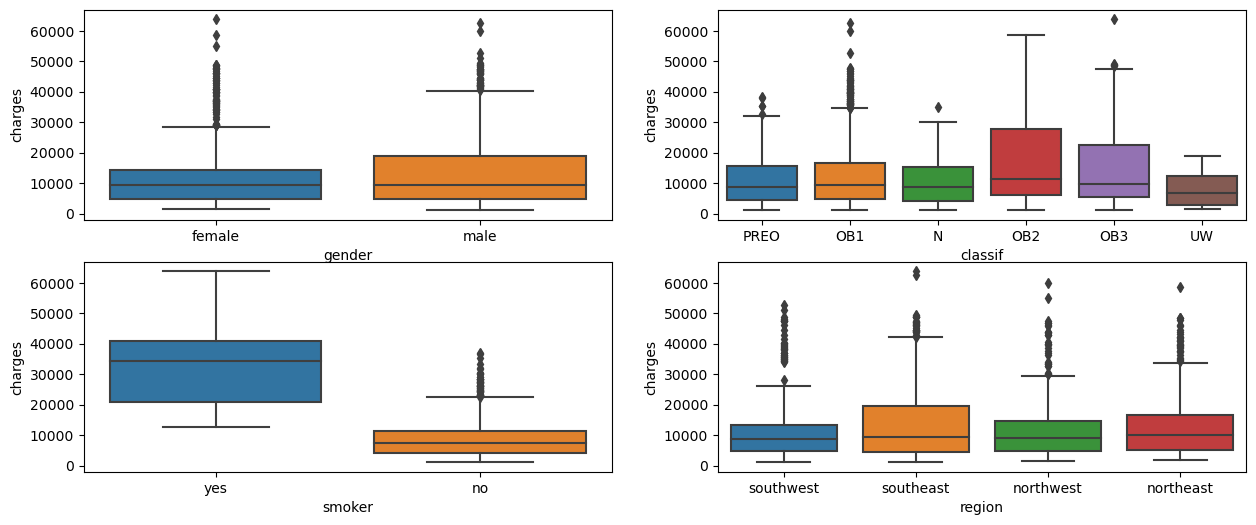

In [27]:
#Analysd categorical values based on the 'charges'

fig,axs = plt.subplots(2,2,figsize = (15,6))
axs = axs.ravel()
j = 0
for i in cat:
    sns.boxplot(y="charges", x =i, data = df, ax=axs[j])
    j+=1
    
plt.show()

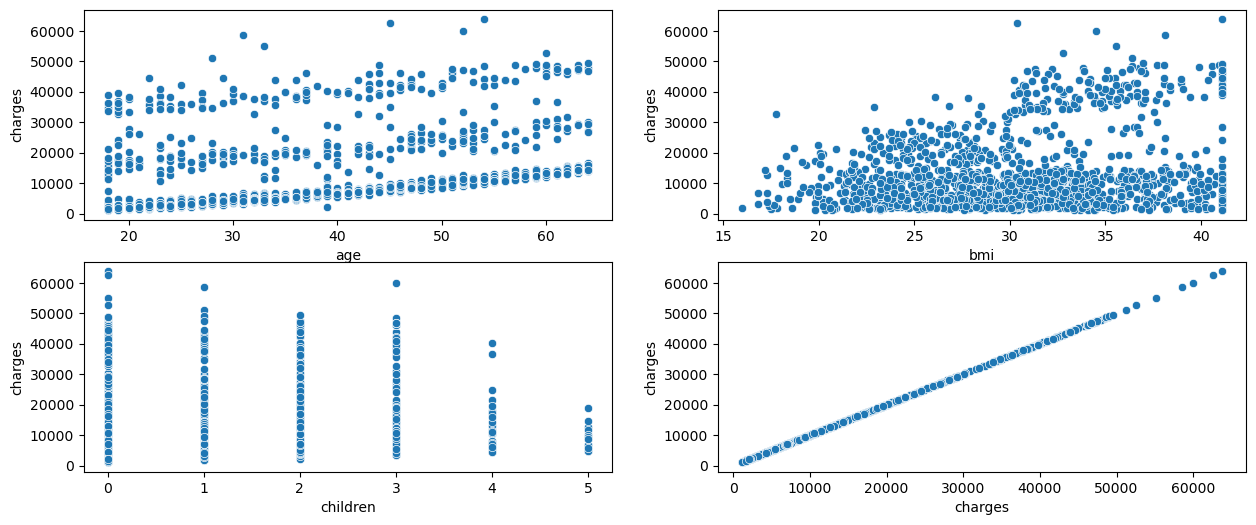

In [28]:
#Visualized numerical values based on the 'charges'

fig,axs = plt.subplots(2,2,figsize = (15,6))
axs = axs.ravel()
j = 0
for i in con:
    sns.scatterplot(y="charges", x =i, data = df, ax=axs[j])
    j+=1
    
plt.show()

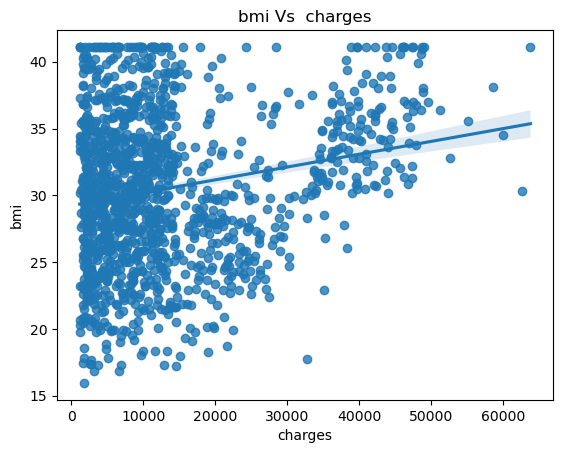

In [29]:
#linear regression plot between 'Bmi' & 'Charges'

sns.regplot(data = df,x = 'charges', y = 'bmi')
plt.title('bmi Vs  charges')
plt.show()

In [30]:
# sns.pairplot(df)
# plt.show()

### Multi-variate

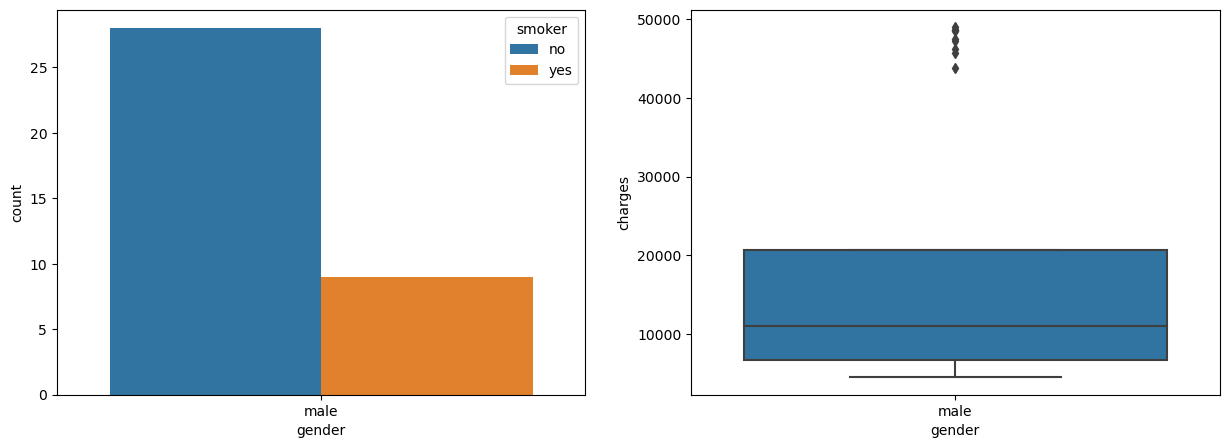

In [31]:
cond1 = df[(df['age'] > 30) & (df['gender'] == 'male') & (df['bmi'] >40)]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='gender',hue='smoker',data=cond1,ax=ax[0])
sns.boxplot(x='gender',y='charges',data=cond1,ax=ax[1])
plt.show()

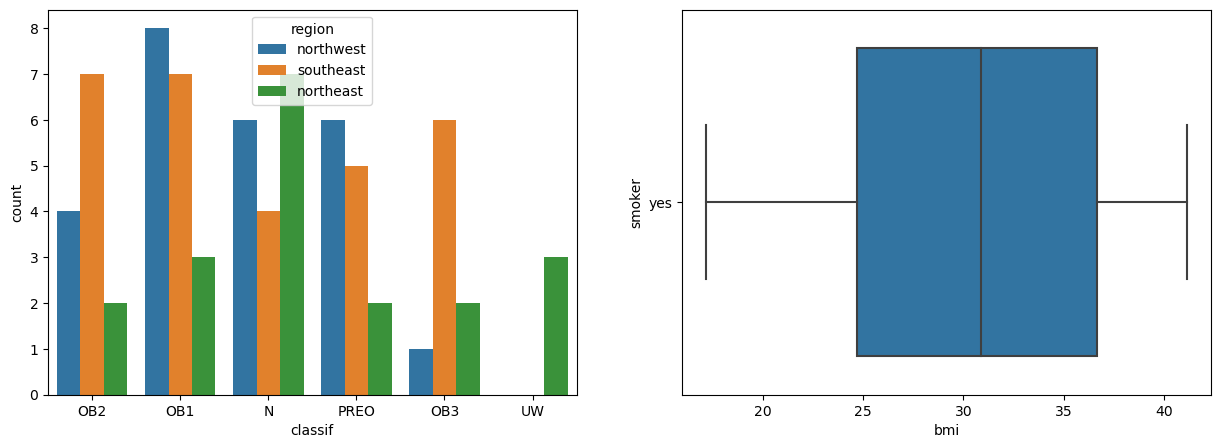

In [32]:
cond2 = df[(df['region'] != 'southwest' ) & (df['children'] >=2) & (df['smoker'] == 'yes')]
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='classif',hue='region',data=cond2,ax=ax[0])
sns.boxplot(x='bmi',y='smoker',data=cond2,ax=ax[1])
plt.show()

### Linear Regression

Label Encoding:

In [33]:
#converting all categorical features (columns) into numerical features

label_encoder = preprocessing.LabelEncoder()
for i in cat:
    df[i] = label_encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   classif   1337 non-null   int32  
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   int32  
 6   region    1337 non-null   int32  
 7   charges   1337 non-null   float64
dtypes: float64(2), int32(4), int64(2)
memory usage: 73.1 KB


Feature Scaling:

In [34]:
#scaling all the numerical values under one scale using MinMaxScaler() 

num_cat = ['int32', 'float64', 'int64']
num_df  = df.select_dtypes(include=num_cat)
scaler = MinMaxScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,age,gender,bmi,classif,children,smoker,region,charges
0,0.021739,0.0,0.474789,0.8,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.708207,0.2,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.677589,0.2,0.6,0.0,0.666667,0.053115
3,0.456522,1.0,0.268212,0.0,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.513759,0.8,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...,...
1332,0.695652,1.0,0.596867,0.2,0.6,0.0,0.333333,0.151299
1333,0.000000,0.0,0.634643,0.2,0.0,0.0,0.000000,0.017305
1334,0.000000,0.0,0.830682,0.4,0.0,0.0,0.666667,0.008108
1335,0.065217,0.0,0.391284,0.8,0.0,0.0,1.000000,0.014144


In [35]:
#correlation between each features

corel_matrix = scale_df.corr()
corel_matrix

,age,gender,bmi,classif,children,smoker,region,charges
age,1.000000,-0.021461,0.115712,0.010254,0.043317,-0.027657,0.002480,0.297212
gender,-0.021461,1.000000,0.043823,-0.007215,0.017848,0.076596,0.004936,0.058044
bmi,0.115712,0.043823,1.000000,0.073167,0.009401,0.000983,0.155385,0.201344
classif,0.010254,-0.007215,0.073167,1.000000,-0.027976,-0.009675,0.013767,-0.037438
children,0.043317,0.017848,0.009401,-0.027976,1.000000,0.007331,0.016258,0.067389
smoker,-0.027657,0.076596,0.000983,-0.009675,0.007331,1.000000,-0.002358,0.787234
region,0.002480,0.004936,0.155385,0.013767,0.016258,-0.002358,1.000000,-0.006547
charges,0.297212,0.058044,0.201344,-0.037438,0.067389,0.787234,-0.006547,1.000000


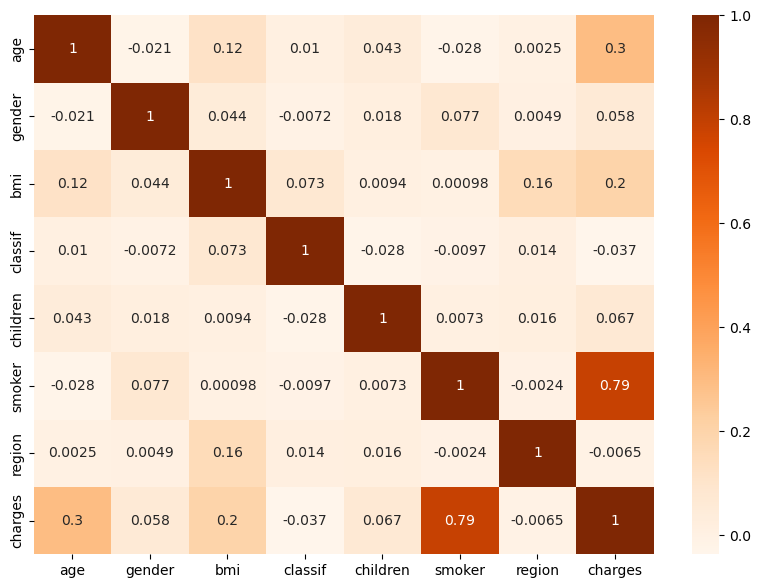

In [36]:
#heat map
plt.figure(figsize=(10,7))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [37]:
#threshold correlation
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [38]:
sel_features=correlation(scale_df,0.5)
len(set(sel_features))

1

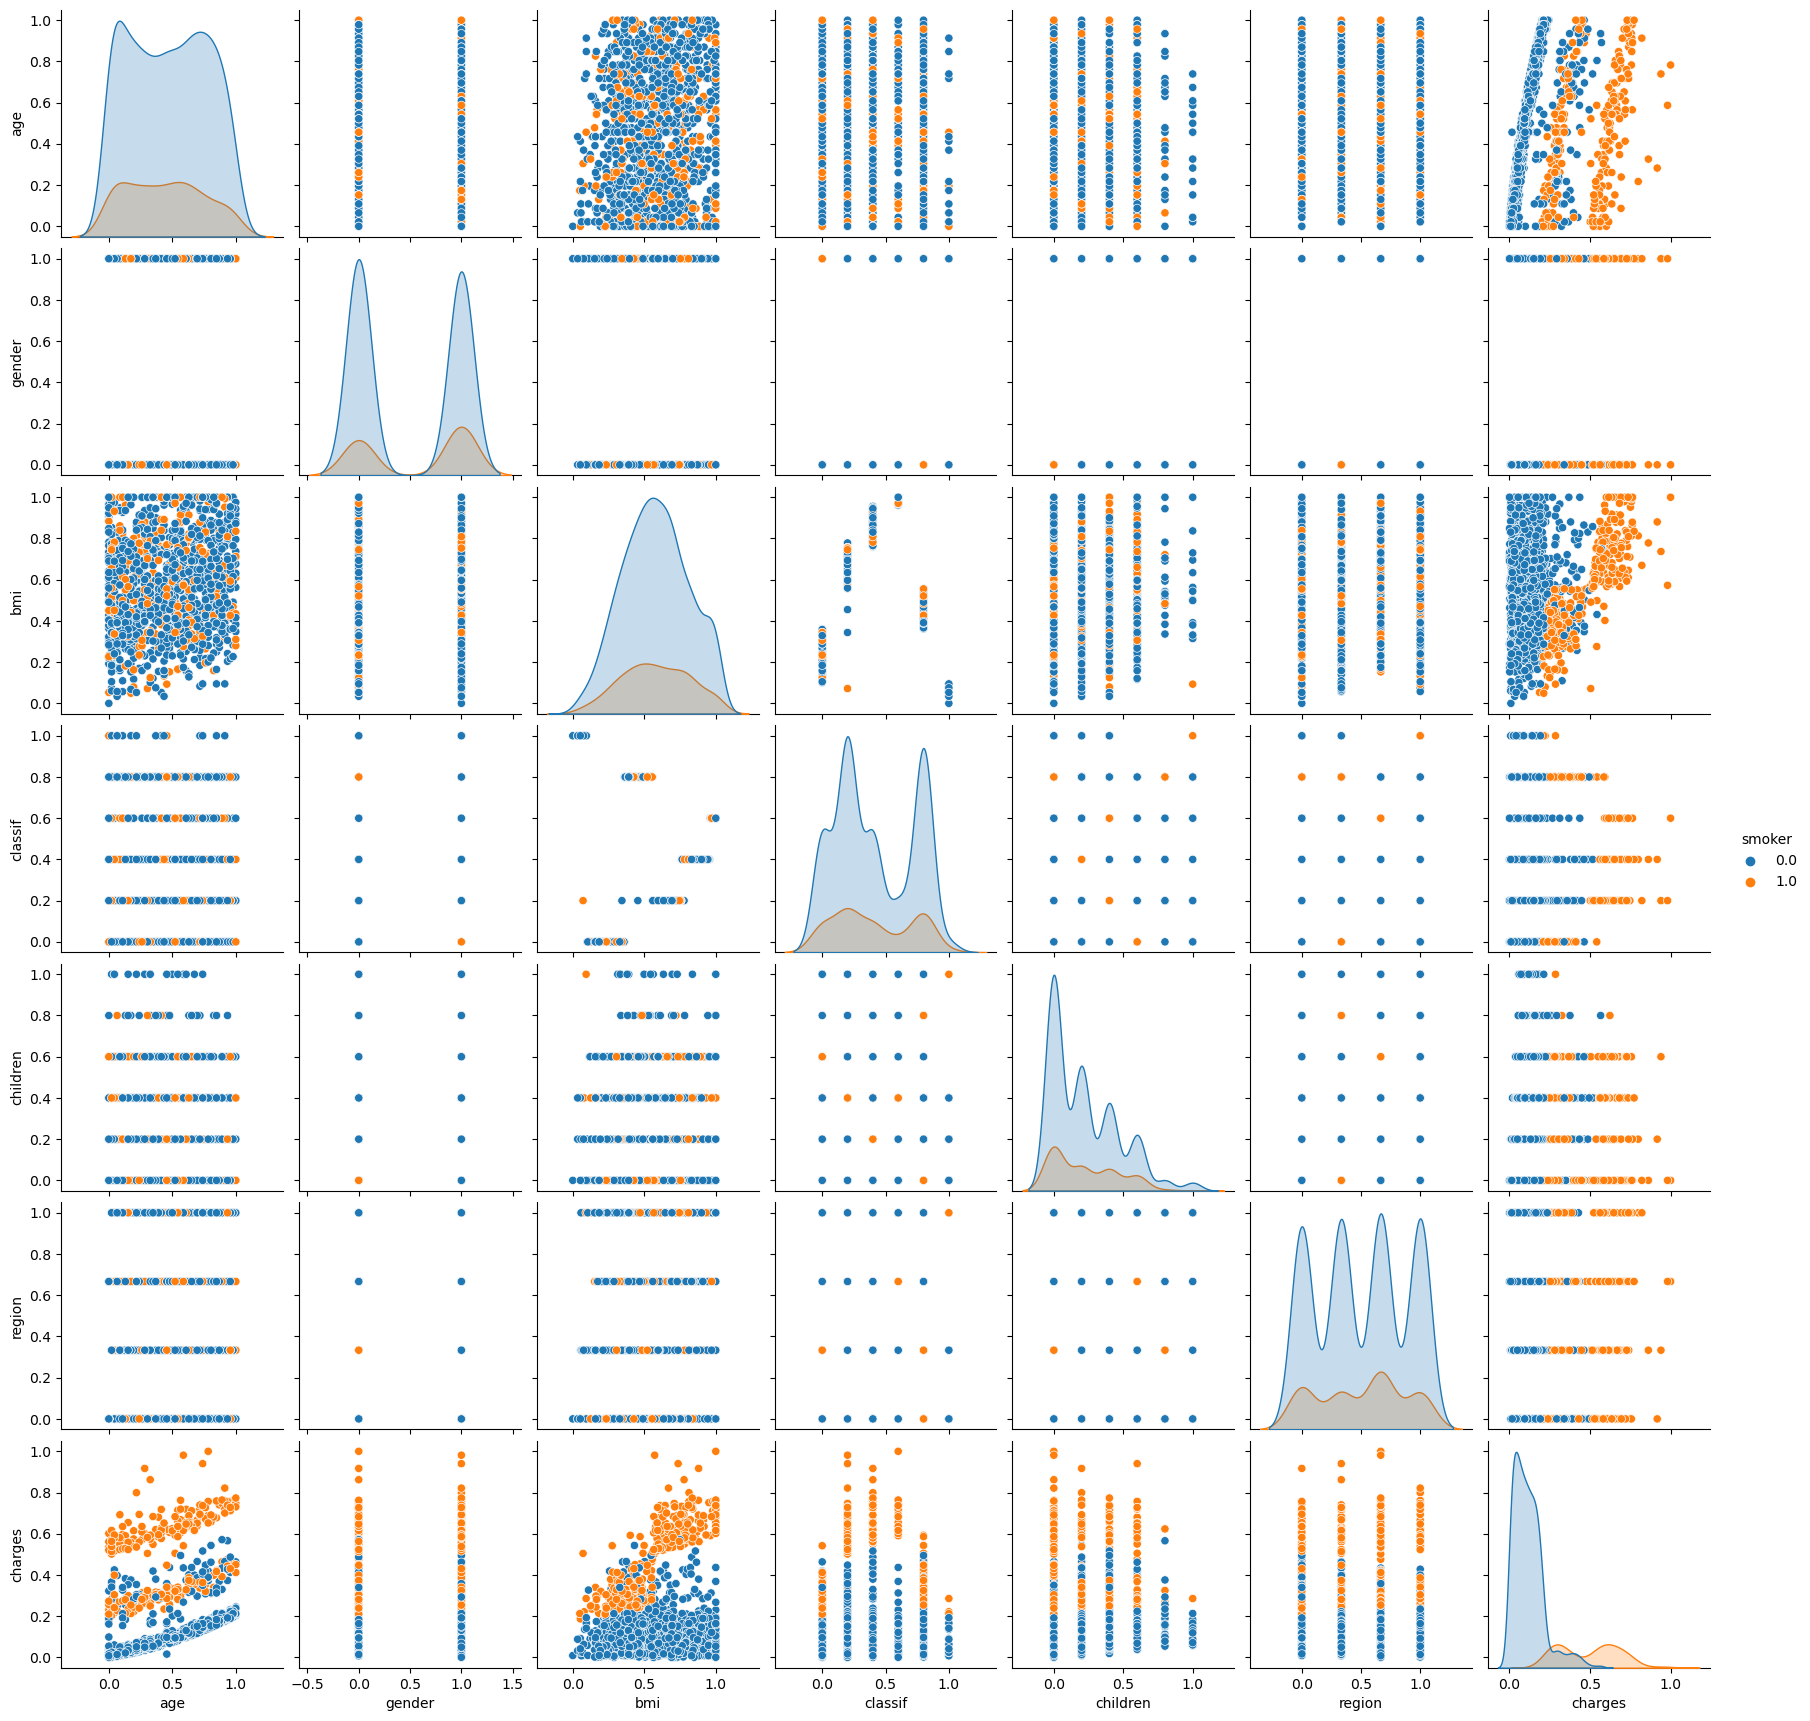

In [39]:
#here smoker hue is 0 & 1
sns.pairplot(scale_df, hue= 'smoker')
plt.show()

In [40]:
sel_features

{'charges'}

Splitting the data:

In [41]:
y =df['charges']
X = scale_df.drop(['charges'], axis = 1)

In [42]:
X.shape

(1337, 7)

In [43]:
y.shape

(1337,)

In [44]:
#splitting the data into training nd testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape)
print(y_test.shape)

(935, 7)
(402,)


**Linear Regression:**

In [45]:
linear = LinearRegression()
lr_model = linear.fit(X_train, y_train)

In [46]:
y_pred = lr_model.predict(X_test)

In [47]:
r2_train = lr_model.score(X_train, y_train)
intercept = lr_model.intercept_
slope= lr_model.coef_

In [48]:
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mape = mean_absolute_percentage_error(y_test, y_pred)

In [49]:
r2_test = lr_model.score(X_test, y_test)
r2_test

0.7691075169404455

In [50]:
print('R_square:', r2_train)
print('Intercept:', intercept)
print('Slope:',slope)

R_square: 0.745669546940236
Intercept: -1967.595214406927
Slope: [12568.98230912    85.04762776  9166.70889439 -2109.75704835
  2786.88807072 23323.61358059  -890.96827841]


In [51]:
r2_score_train=[]
r2_score_test=[]
rmse=[]
mse=[]
mae=[]
mape=[]

In [52]:
print("RMSE:", lr_rmse)
rmse.append(lr_rmse)
print("MSE:", lr_mse)
mse.append(lr_mse)
print("MAE:", lr_mae )
mae.append(lr_mae)
print("MAPE:", lr_mape)
mape.append(lr_mape)

RMSE: 5923.012713979544
MSE: 35082079.60996333
MAE: 4101.523694974672
MAPE: 0.42388010536551674


In [53]:
f = 7 #features count
print("tr:",r2_train)
print("te:",r2_test)

tr: 0.745669546940236
te: 0.7691075169404455


In [67]:
# def adjusted_r2_score(model,x,y):
#     r2_scores=model.score(x,y)
#     n=x.count()
#     x=len(X_test.columns)-1
#     adjusted_r2_score=1-((1-r2_scores)*(n-1)/(n-x-1))
#     return adjusted_r2_score[0]

In [54]:
adjusted_train_r2 = 1-((1-0.64)*(935-1)/(935-f-1))
adjusted_test_r2 = 1-((1-0.70)*(402-1)/(402-f-1))
print("Adjusted Train R2:",adjusted_train_r2)
r2_score_train.append(adjusted_train_r2)
print("Adjusted Test R2:", adjusted_test_r2)
r2_score_test.append(adjusted_test_r2)
#clear descp

Adjusted Train R2: 0.6372815533980583
Adjusted Test R2: 0.6946700507614213


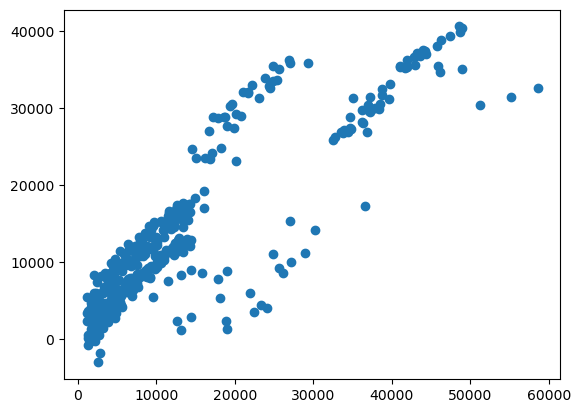

In [55]:
plt.scatter(y_test,y_pred)
plt.show()

## Decision Tree Regressor

In [56]:
from sklearn import tree

In [57]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
dt = DecisionTreeRegressor()

In [59]:
param_grid2={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [60]:
grid_cv2 = GridSearchCV(dt,param_grid2,cv=kf,scoring="r2")

In [61]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='r2')

In [62]:
grid_cv2.best_score_

0.8275643637892347

In [63]:
grid_cv2.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [64]:
grid_cv2.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)

In [65]:
dt_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)

In [66]:
dt_r2train = dt_model.score(X_train,y_train)

r2_score_train.append(dt_r2train)
dt_r2train

0.8596344936327884

In [68]:
dt_r2test = dt_model.score(X_test, y_test)
r2_score_test.append(dt_r2test)
dt_r2test

0.8774914234393275

In [69]:
y_pred1=dt_model.predict(X_test)

In [70]:
dt_rmse = mean_squared_error(y_test, y_pred1, squared=False)
dt_r2 = r2_score(y_test,y_pred1)
dt_mae = mean_absolute_error(y_test, y_pred1)
dt_mape = mean_absolute_percentage_error(y_test, y_pred1)

In [71]:
print("rmse",dt_rmse)
rmse.append(dt_rmse)
print("r2:",dt_r2)
mse.append(dt_r2)
print("Mae:", dt_mae)
mae.append(dt_mae)
print("MAPE:", dt_mape)
mape.append(dt_mape)

rmse 4314.40603368301
r2: 0.8774914234393275
Mae: 2719.202217434365
MAPE: 0.36244862830009694


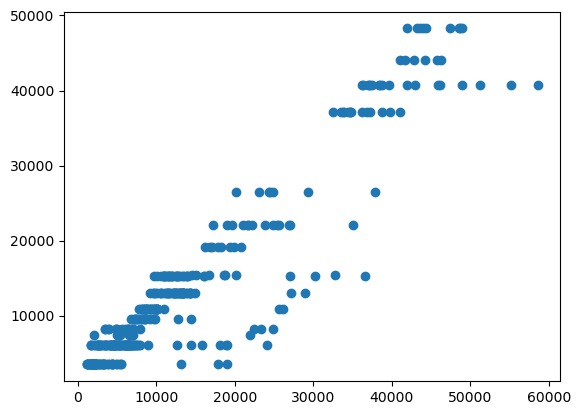

In [72]:
plt.scatter(y_test,y_pred1)
plt.show()

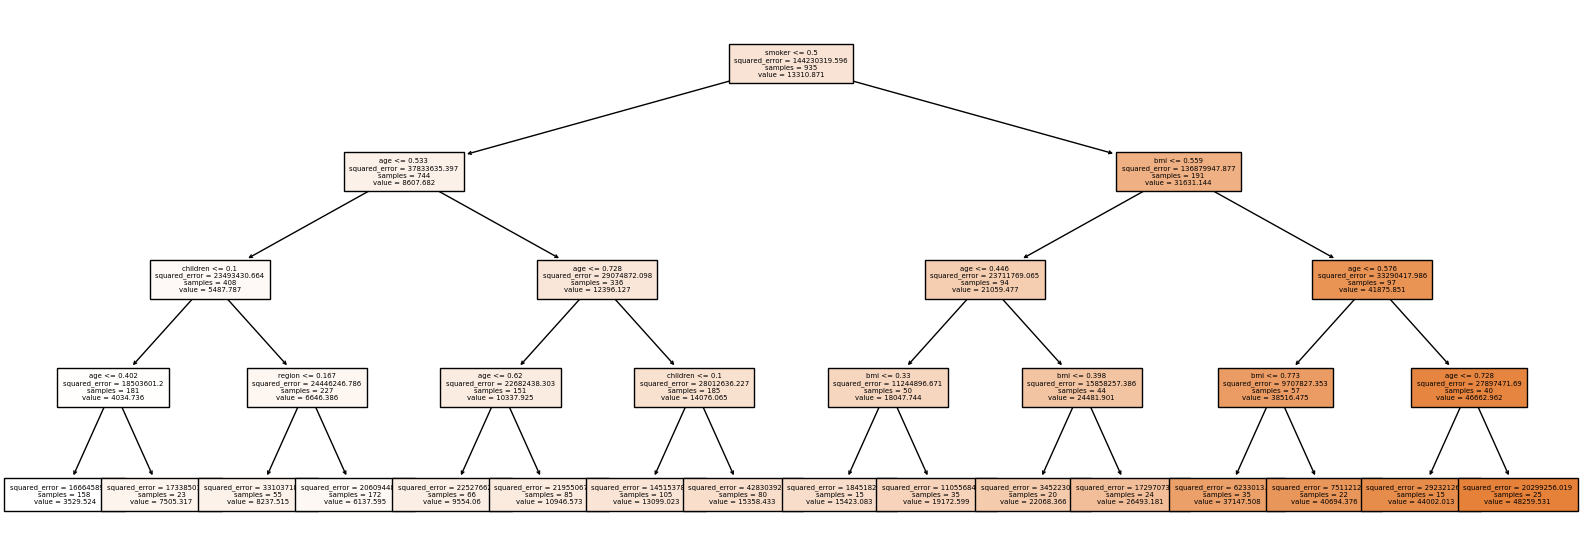

In [73]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=X.columns,filled=True,fontsize=5)
plt.show()

## Random Forest Regressor

In [74]:
param_grid={"n_estimators":np.arange(20,201,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [75]:
rf = RandomForestRegressor()

In [76]:
grid_cv1=GridSearchCV(rf,param_grid,cv=kf,scoring="r2")

In [77]:
grid_cv1.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])},
             scoring='r2')

In [78]:
grid_cv1.best_score_

0.8386184037624046

In [79]:
grid_cv1.best_params_

{'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 20}

In [80]:
grid_cv1.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=20)

In [131]:
rf_model = RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=10,n_estimators=10)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=10,
                      n_estimators=10)

In [82]:
rf_r2_train = rf_model.score(X_train,y_train)
r2_score_train.append(rf_r2_train)
rf_r2_train

0.837650167863604

In [83]:
rf_r2_test = rf_model.score(X_test, y_test)
r2_score_test.append(rf_r2_test)
rf_r2_test

0.8684724831317938

In [84]:
y_pred2=rf_model.predict(X_test)


In [85]:
rf_rmse = mean_squared_error(y_test, y_pred2, squared=False)
rf_r2 = r2_score(y_test,y_pred2)
rf_mae =  mean_absolute_error(y_test, y_pred2)
rf_mape = mean_absolute_percentage_error(y_test, y_pred2)

In [86]:
print("rmse",rf_rmse)
rmse.append(rf_rmse)
print("r2:",rf_r2)
mse.append(rf_r2)
print("Mae:",rf_mae)
mae.append(rf_mae)
print("MAPE:", rf_mape)
mape.append(rf_mape)

rmse 4470.396848637403
r2: 0.8684724831317938
Mae: 2783.9433396712916
MAPE: 0.31969801255142166


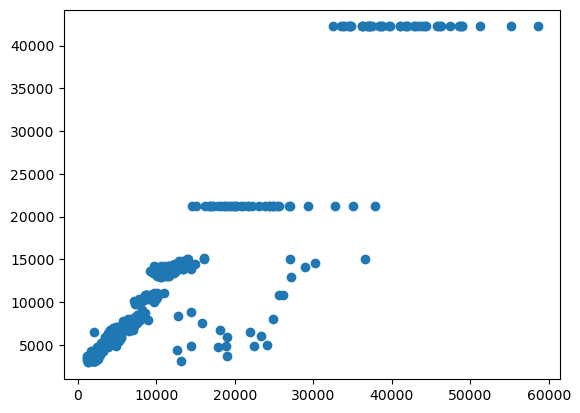

In [87]:
plt.scatter(y_test,y_pred2)
plt.show()

### Ada Booster

In [88]:
ada = AdaBoostRegressor()

In [89]:
kf=KFold(n_splits=5)

In [90]:
param_grid={"n_estimators":np.arange(10,101,10), 
            "learning_rate":np.arange(0.05,1,0.05), 
}

In [91]:
grid_cv = GridSearchCV(ada,param_grid,cv=kf,scoring="r2")


In [92]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='r2')

In [93]:
grid_cv.best_params_

{'learning_rate': 0.05, 'n_estimators': 20}

In [94]:
grid_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.05, n_estimators=20)

In [95]:
grid_cv.best_score_  #accuracy

0.8318747823335897

In [132]:
ada_model = AdaBoostRegressor(learning_rate=0.05, n_estimators=20,random_state=42)

ada_model.fit(X_train,y_train)

In [97]:
adr2_train = ada_model.score(X_train,y_train)
r2_score_train.append(adr2_train)
adr2_train

0.850916056019536

In [98]:
adr2_test = ada_model.score(X_test,y_test)
r2_score_test.append(adr2_test)
adr2_test

0.8707257814025575

In [99]:
y_pred3 = ada_model.predict(X_test)

In [100]:
ad_rmse = mean_squared_error(y_test, y_pred3, squared=False)
ad_r2 = r2_score(y_test,y_pred3)
ad_mae =  mean_absolute_error(y_test, y_pred3)
ad_mape = mean_absolute_percentage_error(y_test, y_pred3)

In [101]:
print("rmse",ad_rmse)
rmse.append(ad_rmse)
print("r2:",ad_r2)
mse.append(ad_r2)
print("Mae:", ad_mae)
mae.append(ad_mae)
print("MAPE:",ad_mape)
mape.append(ad_mape)

rmse 4431.938532305946
r2: 0.8707257814025575
Mae: 2984.426915749315
MAPE: 0.4359076779874292


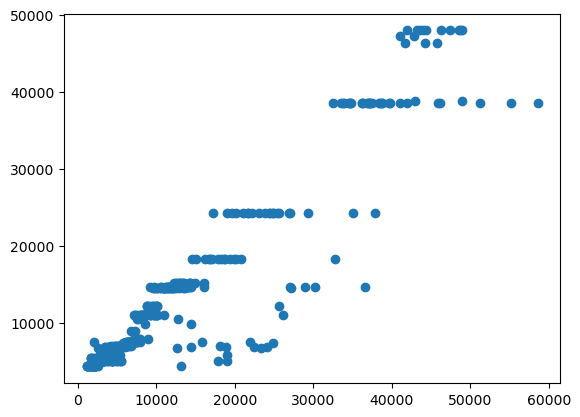

In [102]:
plt.scatter(y_test,y_pred3)
plt.show()

## KNN 

In [103]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsRegressor(k),X_train,y_train,scoring="r2",cv=kf)
    r2_scores.append(np.mean(knn_score))

In [104]:
for k in range(2,25):
    print("number of neighbors:",k,":",r2_scores[k-2])

number of neighbors: 2 : 0.7571699516100588
number of neighbors: 3 : 0.7736477824710549
number of neighbors: 4 : 0.7838633655125893
number of neighbors: 5 : 0.7840041075249208
number of neighbors: 6 : 0.7850122418339847
number of neighbors: 7 : 0.7865839034418819
number of neighbors: 8 : 0.781111951311295
number of neighbors: 9 : 0.7792461437370544
number of neighbors: 10 : 0.7782861594357287
number of neighbors: 11 : 0.7776889224516266
number of neighbors: 12 : 0.77514409982174
number of neighbors: 13 : 0.7753144986472968
number of neighbors: 14 : 0.7723713611433186
number of neighbors: 15 : 0.7671458787268695
number of neighbors: 16 : 0.7666374856673361
number of neighbors: 17 : 0.7656793655753723
number of neighbors: 18 : 0.763730818238221
number of neighbors: 19 : 0.7621951737556231
number of neighbors: 20 : 0.758631675002567
number of neighbors: 21 : 0.7563574094716643
number of neighbors: 22 : 0.7535479927719362
number of neighbors: 23 : 0.7508862750005745
number of neighbors: 24

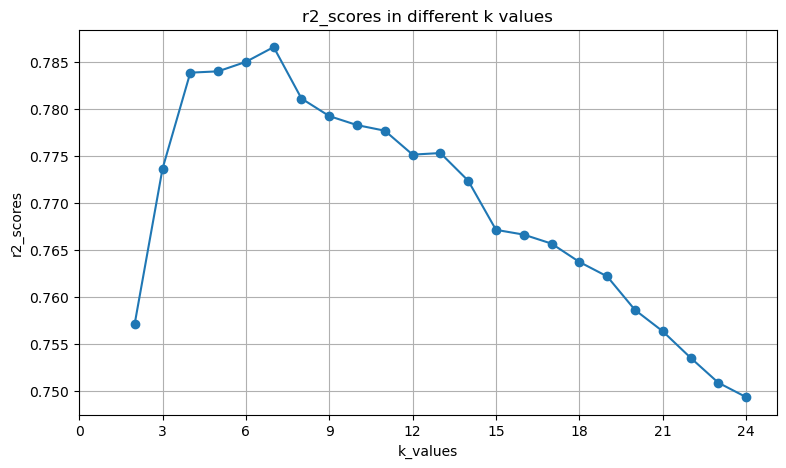

In [105]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [106]:
k= 9
kn_model = KNeighborsRegressor(k).fit(X_train, y_train)
y_pred_4 = kn_model.predict(X_test)

In [107]:
knr2_train = kn_model.score(X_train, y_train)
r2_score_train.append(knr2_train)
knr2_test = kn_model.score(X_test, y_test)
r2_score_test.append(knr2_test)

In [108]:
# print("Model adjusted r2 score on training data :",adjusted_r2_score(knn_model,x_train,y_train))
# print("Model adjusted r2 score on test data :",adjusted_r2_score(knn_model,x_test,y_test))
# print()

In [109]:
print("accuracy_train:",knr2_train)
print("accuracy_test:",knr2_test)

accuracy_train: 0.8409449272875684
accuracy_test: 0.8627787669467091


In [110]:
kn_rmse = mean_squared_error(y_test, y_pred_4, squared=False)
kn_r2 = r2_score(y_test,y_pred_4)
kn_mae = mean_absolute_error(y_test, y_pred_4)
kn_mape = mean_absolute_percentage_error(y_test, y_pred_4)

In [111]:
print("rmse",kn_rmse)
rmse.append(kn_rmse)
print("r2:",kn_r2)
mse.append(kn_r2)
print("Mae:", kn_mae)
mae.append(kn_mae)
print("Mape:", kn_mape)
mape.append(kn_mape)

rmse 4566.131625452386
r2: 0.8627787669467091
Mae: 2820.0513109969593
Mape: 0.3710244146345052


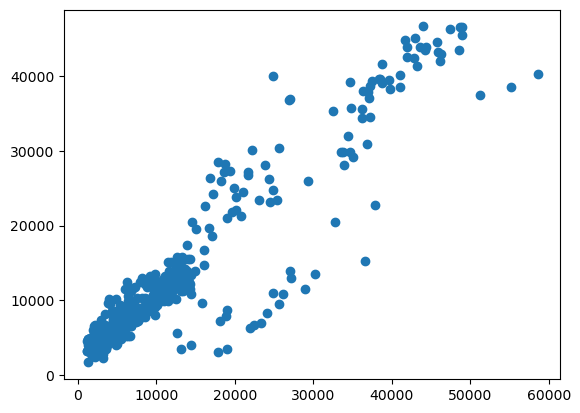

In [112]:
plt.scatter(y_test,y_pred_4)
plt.show()

## Stacking 

In [113]:
level1=[]
level1.append(("lr",lr_model))
level1.append(("knn",kn_model))
level1.append(("svr",SVR()))
level1.append(("dt",dt_model))
level1.append(("rnd",rf_model))
level1.append(("ada", ada_model))
level2=LinearRegression() 
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [114]:
level1

[('lr', LinearRegression()),
 ('knn', KNeighborsRegressor(n_neighbors=9)),
 ('svr', SVR()),
 ('dt',
  DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=30)),
 ('rnd',
  RandomForestRegressor(max_depth=7, min_samples_leaf=40, min_samples_split=10,
                        n_estimators=10)),
 ('ada',
  AdaBoostRegressor(learning_rate=0.1, n_estimators=10, random_state=42))]

In [115]:
st_model =stack_model.fit(X_train, y_train)
y_pred_st = st_model.predict(X_test)

In [116]:
score=cross_val_score(stack_model,X_train,y_train,scoring="r2",cv=kf)
print(score)

[0.87456805 0.870253   0.83068116 0.79344247 0.81203173]


In [117]:
print("Rscore:",np.mean(score))

Rscore: 0.8361952820094507


In [118]:
str2_train = st_model.score(X_train, y_train)
r2_score_train.append(str2_train)
str2_test = st_model.score(X_test, y_test)
r2_score_test.append(str2_test)

In [119]:
print("R-square train data:",str2_train )
print("R-square test data:",str2_test )

R-square train data: 0.85697884777972
R-square test data: 0.8801207173197032


In [120]:
st_rmse = mean_squared_error(y_test, y_pred_st, squared=False)
st_r2 = r2_score(y_test,y_pred_st)
st_mae = mean_absolute_error(y_test, y_pred_st)
st_mape = mean_absolute_percentage_error(y_test, y_pred_st)

In [121]:
print("rmse",st_rmse)
rmse.append(st_rmse)
print("r2:",st_r2)
mse.append(st_r2)
print("Mae:",st_mae)
mae.append(st_mae)
print("MAPE:", st_mape)
mape.append(st_mape)

rmse 4267.8567655638935
r2: 0.8801207173197032
Mae: 2611.099844791131
MAPE: 0.3335120453196997


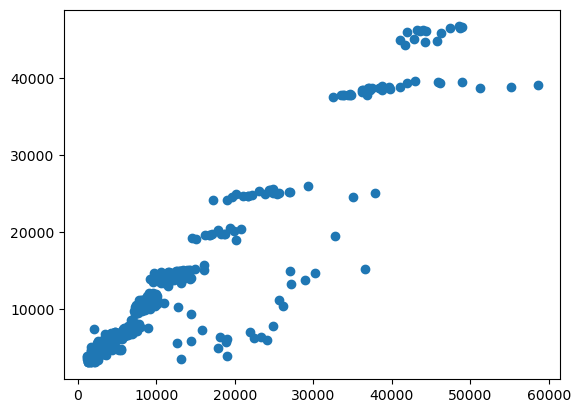

In [122]:
plt.scatter(y_test,y_pred_st)
plt.show()

**Summary:**

In [123]:
model_list=["Linear Regression","Decision Tree Regression","Random Forest Regression","Ada-boost Regression","KNN Regression","Stacked Regression"]
metric_list=["Models","r2 Score(Train)","r2 Score(Test)","RMSE","MSE","MAE","MAPE"]

In [124]:
r2_score_train

[0.6372815533980583,
 0.8596344936327884,
 0.837650167863604,
 0.850916056019536,
 0.8409449272875684,
 0.85697884777972]

In [125]:
mae

[4101.523694974672,
 2719.202217434365,
 2783.9433396712916,
 2984.426915749315,
 2820.0513109969593,
 2611.099844791131]

In [126]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    ab=[[model_list[i],r2_score_train[i],r2_score_test[i],rmse[i],mse[i],mae[i],mape[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,r2 Score(Train),r2 Score(Test),RMSE,MSE,MAE,MAPE
0,Linear Regression,0.637282,0.694670,5923.012714,3.508208e+07,4101.523695,0.423880
1,Decision Tree Regression,0.859634,0.877491,4314.406034,8.774914e-01,2719.202217,0.362449
2,Random Forest Regression,0.837650,0.868472,4470.396849,8.684725e-01,2783.943340,0.319698
3,Ada-boost Regression,0.850916,0.870726,4431.938532,8.707258e-01,2984.426916,0.435908
4,KNN Regression,0.840945,0.862779,4566.131625,8.627788e-01,2820.051311,0.371024
5,Stacked Regression,0.856979,0.880121,4267.856766,8.801207e-01,2611.099845,0.333512


In [127]:
rvse_list = list(final_results['Models'])
rvse_list

['Linear Regression',
 'Decision Tree Regression',
 'Random Forest Regression',
 'Ada-boost Regression',
 'KNN Regression',
 'Stacked Regression']

In [128]:
rvse_list.reverse()

In [129]:
rvse_list

['Stacked Regression',
 'KNN Regression',
 'Ada-boost Regression',
 'Random Forest Regression',
 'Decision Tree Regression',
 'Linear Regression']

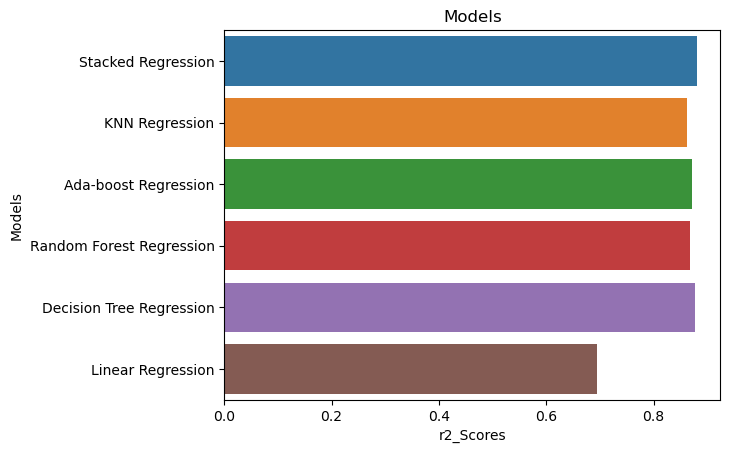

In [130]:
models = final_results['Models']
test_score = final_results['r2 Score(Test)']
# ab = round(test_score.reverse(),4)

sns.barplot(test_score,models ,orient='h',order=rvse_list)
plt.xlabel('r2_Scores')
# for i, v in enumerate(test_score):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# Over all 'Stacked Regression Model' outperformed 'Decision Tree Regressor', R2 score is 88%